In [52]:
import cv2

from matplotlib import pyplot as plt
import numpy as np
import tabulate

import analysis_library as al

%matplotlib widget

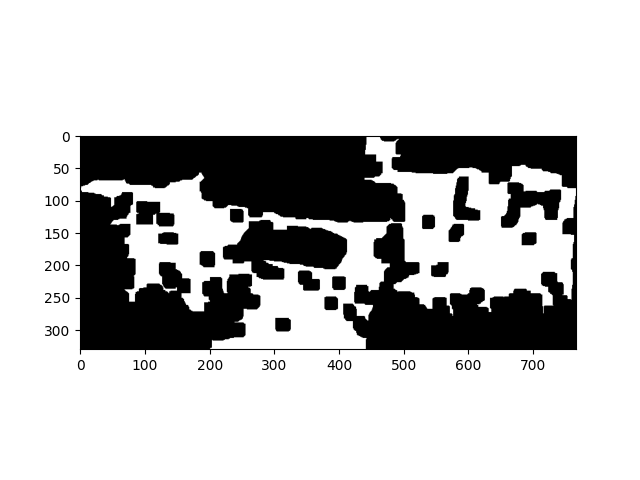

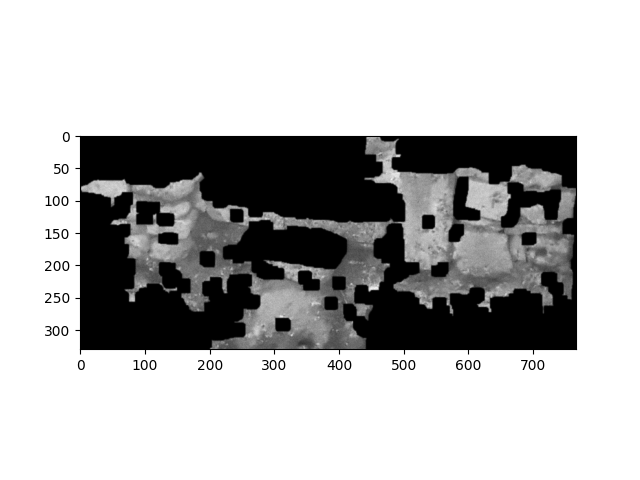

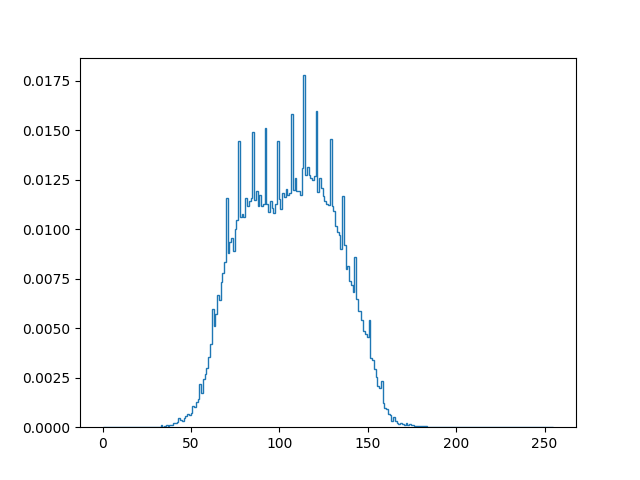

In [56]:
img = cv2.imread('analysis_output/006/renoised_segments/segment_126/renoised_r_026_sr_013.png', cv2.IMREAD_GRAYSCALE)
mask = np.loadtxt('analysis_output/006/segment_masks/mask_126.txt', dtype=np.uint8)
plt.figure()
plt.imshow(mask, cmap='gray')
plt.show()
plt.figure()
plt.imshow(img, cmap='gray')
plt.show()


hist, edges = np.histogram(img[mask==1], bins=256, range=(0,255))
hist = hist/np.sum(hist)

noise_stats = al.statistic_analysis(img[mask==1])

plt.figure()
plt.stairs(hist, edges)
plt.show()




In [45]:
plt.close()